# <font color='black'>Data Science Academy</font>

## <font color='black'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='red'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.5


In [2]:
# Importar as bibliotecas necessárias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sea 
import datetime as dt

In [3]:
# Importar a função DataFrame do Pandas
from pandas import DataFrame

In [4]:
# Carregar os dados para analise:
varejo =pd.read_csv(r"C:\Users\Lukas\Documents\Data Science\DSA\Cap13\dados\dataset.csv")

In [5]:
# Verificar se os dados foram carregados corretamente 
varejo.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Análise Exploratória 

In [6]:
# Verificando os conjuntos de dados:
varejo.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Verificando o tipo de dado de cada coluna
varejo.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
# Valores estatísticos iniciais observados para vendas: 
varejo['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [9]:
# Verificando se há registros duplicados: 
varejo[varejo.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
# Verificando de há valores ausentes
varejo.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

## Business Intelligence - Perguntas de negócio: 

### 1 - Qual cidade com maior valor de venda de produtos da categoria 'Office Supplies'?

In [11]:
# Imprimindo os dados da categoria:  
varejo[ ['Cidade', 'Categoria'] ]

,Cidade,Categoria
0,Henderson,Furniture
1,Henderson,Furniture
2,Los Angeles,Office Supplies
3,Fort Lauderdale,Furniture
4,Fort Lauderdale,Office Supplies
...,...,...
9695,Inglewood,Office Supplies
9696,Inglewood,Office Supplies
9697,Inglewood,Technology
9698,San Luis Obispo,Office Supplies


In [12]:
# Filtrando pelo índice
filtro = varejo['Categoria'] == 'Office Supplies'
resultado = varejo[filtro]
resultado.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900


In [13]:
# Agrupar por cidade e calcular a soma das vendas
cidade = resultado.groupby('Cidade')['Valor_Venda'].sum()

# Encontrar a cidade com a maior soma de vendas
cidade_maior = cidade.idxmax()
vendas = cidade.max()

# Resultado: 
print(f"A cidade com maior valor de venda de produtos é {cidade_maior} com um total de vendas de {vendas}.")

A cidade com maior valor de venda de produtos é New York City com um total de vendas de 68362.814.


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

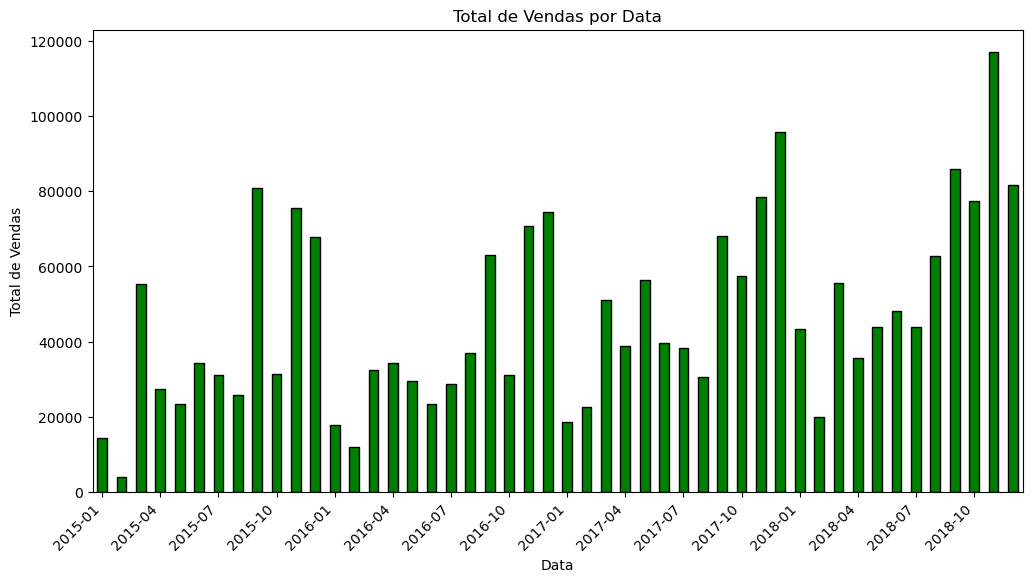

In [14]:
# Converter as datas para Datetime: 
varejo['Data_Pedido'] = pd.to_datetime(varejo['Data_Pedido'], format='%d/%m/%Y')

# Total de vendas e datas: 
data_do_pedido = varejo.groupby(varejo['Data_Pedido'].dt.to_period("M"))['Valor_Venda'].sum()

#Criando o gráfico: 
plt.figure(figsize=(12, 6))
ax = data_do_pedido.plot(kind='bar', color='green', edgecolor='black')

# Ajustar os rótulos no eixo x
intervalo = 3  # Exibir a cada 3 meses
ax.set_xticks(range(0, len(data_do_pedido), intervalo))
ax.set_xticklabels([str(periodo) for periodo in data_do_pedido.index[::intervalo]], rotation=45, ha="right")

# Plotar o label 
plt.title('Total de Vendas por Data')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

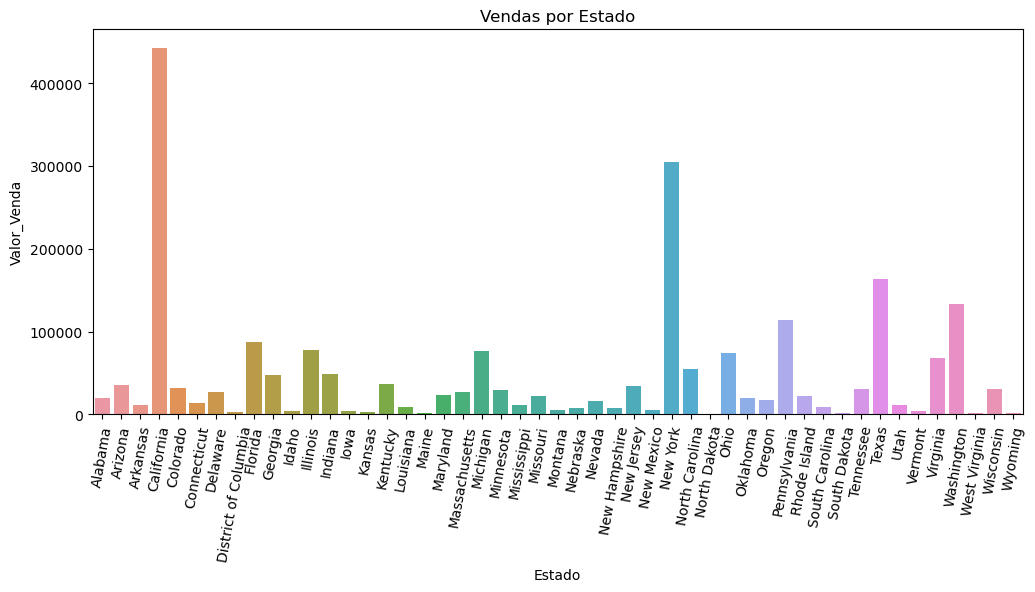

In [49]:
# Agrupar por estado e calcular o total das vendas
vendas_por_estado = varejo.groupby('Estado')['Valor_Venda'].sum().reset_index()

# Plotar o gráfico de barras com Seaborn
plt.figure(figsize=(12, 5))
sea.barplot(data = vendas_por_estado,
            y='Valor_Venda',
            x='Estado').set(title='Vendas por Estado')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

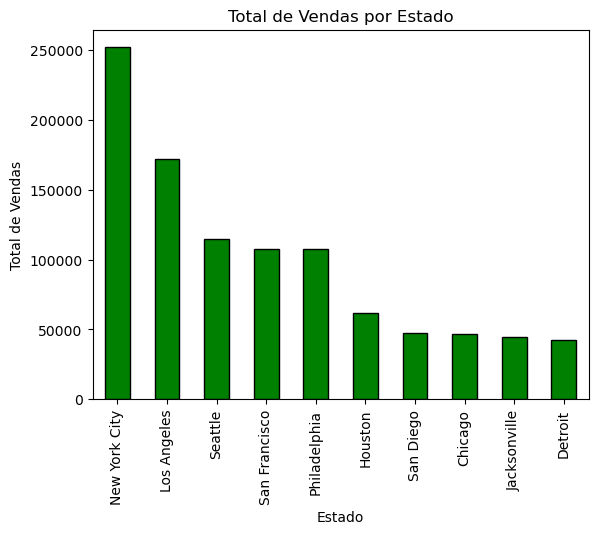

In [16]:
# Agrupar por estado e cidade e calcular o maior total das vendas: 
vendas_por_cidade = varejo.groupby('Cidade')['Valor_Venda'].sum()

# Ordenar as cidades pelo total de vendas em ordem decrescente
cidades_ordenadas = vendas_por_cidade.sort_values(ascending=False)

# Selecionar as top 10 cidades com os maiores valores de venda
top_10_cidades = cidades_ordenadas.head(10)

# Plotar o gráfico de barras
top_10_cidades.plot(kind='bar', color='green', edgecolor='black')
plt.title('Total de Vendas por Estado')
plt.xlabel('Estado')
plt.ylabel('Total de Vendas')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

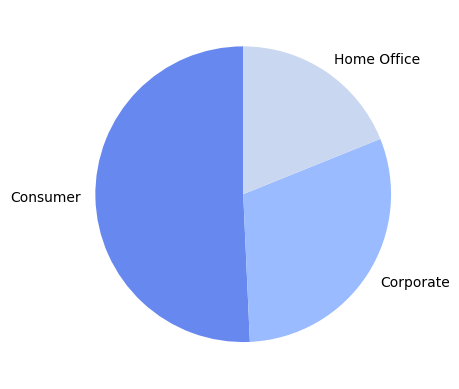

In [58]:
# Segmento com maior total de vendas:
segmento = varejo.groupby('Segmento')['Valor_Venda'].sum()

# Ordenar o segmento por número de vendas:
melhor_segmento = segmento.sort_values(ascending=False)

top_segmento = melhor_segmento.nlargest(3)

# Plot gráfico de pizza:
plt.pie(top_segmento, labels=top_segmento.index, startangle = 90, shadow = False)
plt.show()

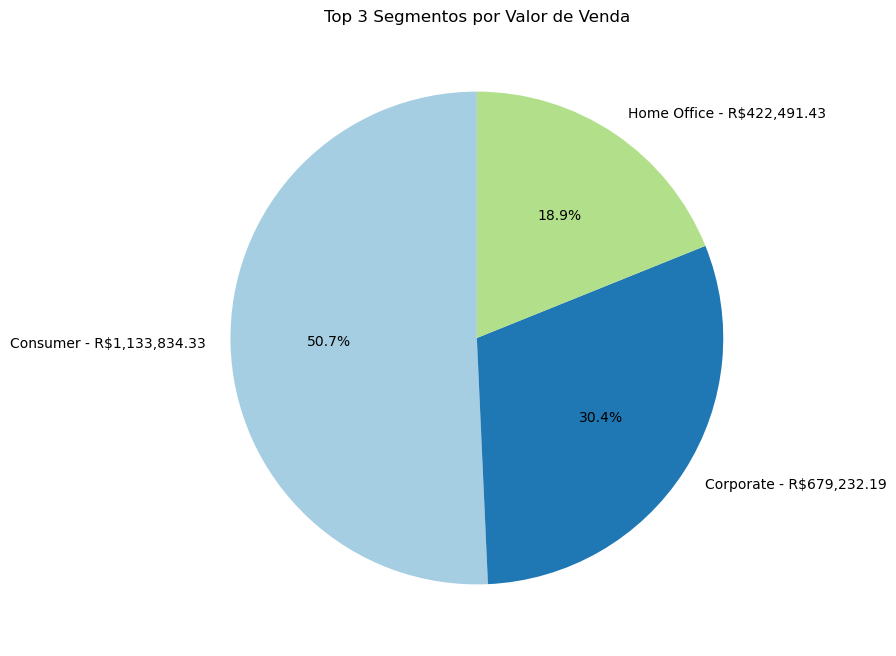

In [69]:
# Segmento com maior total de vendas:
segmento = varejo.groupby('Segmento')['Valor_Venda'].sum()

# Ordenar o segmento por número de vendas:
melhor_segmento = segmento.sort_values(ascending=False)

top_segmento = melhor_segmento.nlargest(3)

# Plot gráfico de pizza:
plt.figure(figsize=(8, 8))
plt.pie(top_segmento, 
        labels=['{} - R${:,.2f}'.format(seg, valor) for seg, 
                valor in top_segmento.items()],
        startangle=90, 
        autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Top 3 Segmentos por Valor de Venda')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [19]:
# Verificando o formato das datas: 
varejo['Data_Pedido'].head()

0   2017-11-08
1   2017-11-08
2   2017-06-12
3   2016-10-11
4   2016-10-11
Name: Data_Pedido, dtype: datetime64[ns]

In [78]:
# Converter a coluna 'Data' para o formato datetime
varejo['Data_Pedido'] = pd.to_datetime(varejo['Data_Pedido'])

# Criar colunas 'Ano' e 'Mes' a partir da coluna 'Data'
varejo['Ano'] = varejo['Data_Pedido'].dt.year
varejo['Mes'] = varejo['Data_Pedido'].dt.month

# Agrupar por segmento, ano e calcular o total das vendas
total_vendas_ano = varejo.groupby([ 'Ano','Segmento'])['Valor_Venda'].sum().reset_index()

In [79]:
# Visualiza o total de vendas: 
total_vendas_ano

,Ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229
5,2016,Home Office,74134.1332
6,2017,Consumer,288459.5572
7,2017,Corporate,203266.7398
8,2017,Home Office,103639.6270
9,2018,Consumer,323359.6019


## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [22]:
# Primeiro precisamos classifocar o total de vendas acima de 1000: 
varejo[varejo['Valor_Venda'] > 1000]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mes
10,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015,6
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016,9
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016,9
35,CA-2017-117590,2017-12-08,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017,12
54,CA-2017-105816,2017-12-11,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,CA-2015-151330,2015-10-14,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820,2015,10
9636,CA-2016-116638,2016-01-28,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644,2016,1
9646,CA-2017-107104,2017-11-26,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664,2017,11
9657,CA-2017-160717,2017-06-06,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928,2017,6


In [23]:
# Agora classificaremos os pedidos com desconto em uma nova coluna: 
varejo['Desconto'] = varejo['Valor_Venda'].apply(lambda x: 0.15 if x > 1000 else 0.10)

# Contar quantas vendas receberiam 15% de desconto
vendas_com_desconto = varejo[varejo['Desconto'] == 0.15].shape[0]

# Visualizar o total de vendas com desconto: 
print(f'Total de vendas com desconto: {vendas_com_desconto}')

Total de vendas com desconto: 457


### 2 formas de construir o condicional: 
* apply(lambda x: 0.15 if x > 1000 else 0.10)
### Usando Numpy:
* np.where(objeto['coluna'] > 1000, 0.15, 0.10)

In [24]:
# Verificar se a coluna criada está mostrando o desconto
varejo.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mes,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,11,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,11,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,6,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,10,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,10,0.1


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [80]:
# Primeiro calculamos o valor de venda com o desconto: 
varejo['Valor_Descontado'] = varejo['Valor_Venda'] - (varejo['Valor_Venda'] * varejo['Desconto'])

# Verifique se a coluna foi criada: 
varejo.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mes,Desconto,Valor_Descontado
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,11,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,11,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,6,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,10,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,10,0.1,20.13120


In [86]:
# Filtrando as vendas antes do desconto de 15%
antes_desconto = varejo.loc[varejo['Desconto'] == 0.15, 'Valor_Venda']

# Calculando a média antes do desconto: 
antes_desconto.mean()

2116.8078153172864

In [88]:
# Filtrando as vendas antes do desconto de 15%
antes_desconto = varejo.loc[varejo['Desconto'] == 0.15,'Valor_Descontado' ]

# Calculando a média antes do desconto: 
antes_desconto.mean()

1799.2866430196934

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

C:\Users\Lukas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

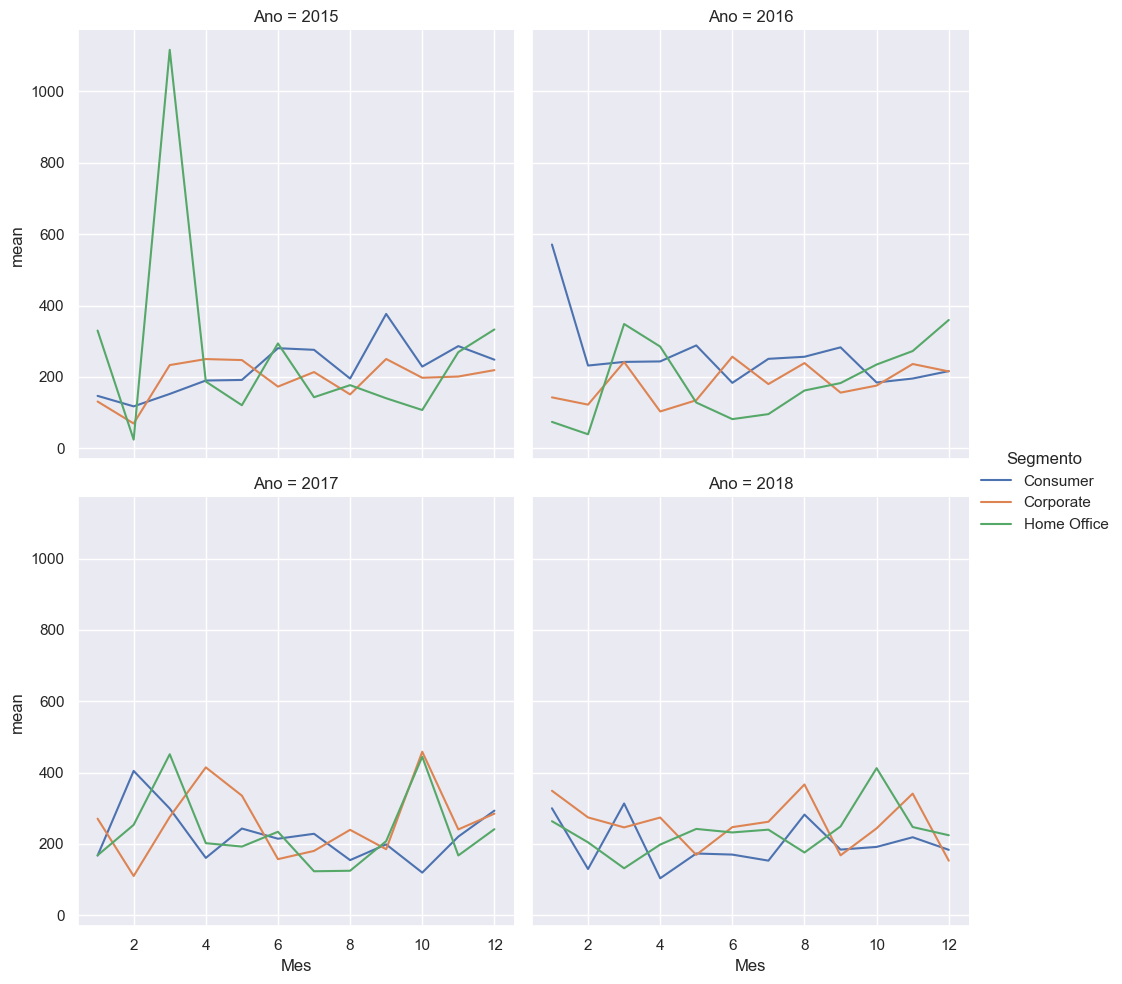

In [103]:
# Como o datetime já foi criado basta atualizar para calcular a média: 
# Agrupar por segmento, ano, mes e calcular a média das vendas:
media_vendas_ano = varejo.groupby([ 'Ano','Mes','Segmento'])['Valor_Venda'].agg([np.mean])

# Vamos extrair os níveis das variáveis categoricas:
anos = media_vendas_ano.index.get_level_values(0)
meses = media_vendas_ano.index.get_level_values(1)
segmentos = media_vendas_ano.index.get_level_values(2)

# Vamos plotar o gráfico de linhas:
# Plot utilizando o 'relplot'
plt.figure(figsize = (12, 6))
sea.set()
fig1 = sea.relplot(kind = 'line',
                   data = media_vendas_ano, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 2)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [108]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
top12 = varejo.groupby(['Categoria','SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda', ascending = False).head(12)

# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
sub = top12[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [112]:
# DataFrame com as categorias: 
sub

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [110]:
# Criamos outro dataframe somente com os totais por categoria
top_sub = sub.groupby('Categoria').sum(numeric_only = True).reset_index()

In [111]:
# Dataframe com categorias 
top_sub

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


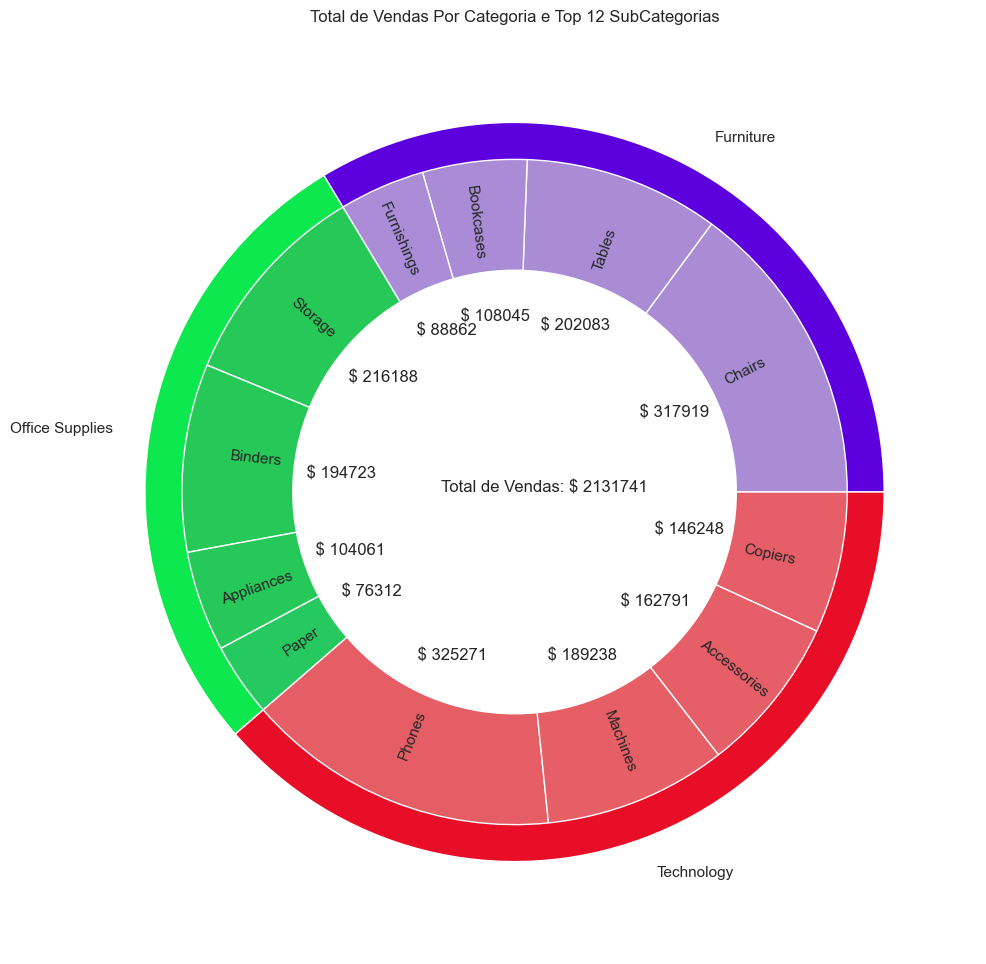

In [113]:
# Criando um super gráfico 
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']


# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(top_sub['Valor_Venda'], 
            radius = 1,
            labels = top_sub['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(sub['Valor_Venda'],
            radius = 0.9,
            labels = sub['SubCategoria'],
            autopct = autopct_format(sub['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(sub['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

### Primeiro projeto de analise de dados finalizado!!!